# FBI Uniform Crime Reporting Analysis | 2012

## Data Modeling

In [1]:
# Importing Important Libraries

# Fundamental Libraries
import numpy as np
import pandas as pd

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Data Processing Libraries
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# Modeling Libraries
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import SGDRegressor

from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

# Libraries for Performance Evaluation
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [2]:
def rmse_metric(mse):
    return np.sqrt(mse)

### Data Collection

In [3]:
offence = pd.read_excel("../Dataset/U.S._Offense_Type_by_Agency_2012.xlsx", skiprows=3, skipfooter=4, header=[1], index_col=[0,1,2,3])
offence.reset_index(inplace=True)

In [4]:
display(offence.head())
display(offence.tail())

,State,Agency Type,Agency Name,Population1,Assault\nOffenses,Aggravated\nAssault,Simple\nAssault,Intimidation,Homicide\nOffenses,Murder and Nonnegligent Manslaughter,...,Gambling\nOffenses,Betting/\nWagering,Operating/\nPromoting/\nAssisting\nGambling,Gambling\nEquipment\nViolations,Sports\nTampering,Porno-\ngraphy/\nObscene\nMaterial,Prost-\nitution\nOffenses,Prost-\nitution,Assisting\nor Pro-\nmoting\nProst-\nitution,Weapon\nLaw\nViolations
0,ALABAMA,Cities,Hoover,82332,870.0,25.0,594.0,251.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,26.0
1,ARIZONA,Cities,Apache Junction,36986,559.0,96.0,381.0,82.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,25.0
2,ARIZONA,Cities,Gilbert,214264,1242.0,123.0,892.0,227.0,5.0,5.0,...,NaN,NaN,NaN,NaN,NaN,16.0,NaN,NaN,NaN,75.0
3,ARIZONA,Metropolitan Counties,Yuma2,214264,555.0,94.0,376.0,85.0,26.0,26.0,...,NaN,NaN,NaN,NaN,NaN,5.0,2.0,1.0,1.0,40.0
4,ARKANSAS,Cities,Alma,5439,197.0,11.0,108.0,78.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,4.0


,State,Agency Type,Agency Name,Population1,Assault\nOffenses,Aggravated\nAssault,Simple\nAssault,Intimidation,Homicide\nOffenses,Murder and Nonnegligent Manslaughter,...,Gambling\nOffenses,Betting/\nWagering,Operating/\nPromoting/\nAssisting\nGambling,Gambling\nEquipment\nViolations,Sports\nTampering,Porno-\ngraphy/\nObscene\nMaterial,Prost-\nitution\nOffenses,Prost-\nitution,Assisting\nor Pro-\nmoting\nProst-\nitution,Weapon\nLaw\nViolations
5230,WISCONSIN,Nonmetropolitan Counties,Sauk,6803,80.0,14.0,63.0,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0
5231,WISCONSIN,Nonmetropolitan Counties,Sawyer,6803,79.0,21.0,56.0,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,15.0
5232,WISCONSIN,Nonmetropolitan Counties,Vilas,6803,42.0,3.0,39.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0
5233,WISCONSIN,Other Agencies - Tribal,Oneida Tribal,6803,56.0,14.0,39.0,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
5234,WISCONSIN,Other Agencies - Tribal,St. Croix Tribal,6803,14.0,1.0,10.0,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,11.0


### Data Cleaning

Since we know that there are a lot of missing values, we have replaced the NaN values with 0.

We opted to replace missing values with 0 rather than imputing values because the absence of data indicates no recorded crime in the area. Imputing values could have artificially inflated the crime statistics, potentially misrepresenting the actual occurrences.

In [5]:
offence.isna().sum()

State                                                 0
Agency Type                                           0
Agency Name                                           0
Population1                                           0
Assault\nOffenses                                   462
Aggravated\nAssault                                1156
Simple\nAssault                                     588
Intimidation                                       1264
Homicide\nOffenses                                 4298
Murder and Nonnegligent Manslaughter               4380
Negligent\nManslaughter                            5086
Justifiable\nHomicide                              5156
Kidnapping/\nAbduction                             3231
Sex\nOffenses                                      1592
Rape                                               2392
Sodomy                                             3716
Sexual\nAssault\nWith An\nObject                   4400
Fondling                                        

In [6]:
offence.fillna(0, inplace=True)
display(offence.head())
offence.isna().sum()

,State,Agency Type,Agency Name,Population1,Assault\nOffenses,Aggravated\nAssault,Simple\nAssault,Intimidation,Homicide\nOffenses,Murder and Nonnegligent Manslaughter,...,Gambling\nOffenses,Betting/\nWagering,Operating/\nPromoting/\nAssisting\nGambling,Gambling\nEquipment\nViolations,Sports\nTampering,Porno-\ngraphy/\nObscene\nMaterial,Prost-\nitution\nOffenses,Prost-\nitution,Assisting\nor Pro-\nmoting\nProst-\nitution,Weapon\nLaw\nViolations
0,ALABAMA,Cities,Hoover,82332,870.0,25.0,594.0,251.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,26.0
1,ARIZONA,Cities,Apache Junction,36986,559.0,96.0,381.0,82.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,25.0
2,ARIZONA,Cities,Gilbert,214264,1242.0,123.0,892.0,227.0,5.0,5.0,...,0.0,0.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,75.0
3,ARIZONA,Metropolitan Counties,Yuma2,214264,555.0,94.0,376.0,85.0,26.0,26.0,...,0.0,0.0,0.0,0.0,0.0,5.0,2.0,1.0,1.0,40.0
4,ARKANSAS,Cities,Alma,5439,197.0,11.0,108.0,78.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0


State                                              0
Agency Type                                        0
Agency Name                                        0
Population1                                        0
Assault\nOffenses                                  0
Aggravated\nAssault                                0
Simple\nAssault                                    0
Intimidation                                       0
Homicide\nOffenses                                 0
Murder and Nonnegligent Manslaughter               0
Negligent\nManslaughter                            0
Justifiable\nHomicide                              0
Kidnapping/\nAbduction                             0
Sex\nOffenses                                      0
Rape                                               0
Sodomy                                             0
Sexual\nAssault\nWith An\nObject                   0
Fondling                                           0
Sex\nOffenses,\nNonforcible                   

Now, we will perform basic text data preprocessing on the column headings.

In [7]:
new_columns = [name.replace('\n', '').replace(' ', '').replace('-', '') for name in offence.columns]
new_columns

['State',
 'AgencyType',
 'AgencyName',
 'Population1',
 'AssaultOffenses',
 'AggravatedAssault',
 'SimpleAssault',
 'Intimidation',
 'HomicideOffenses',
 'MurderandNonnegligentManslaughter',
 'NegligentManslaughter',
 'JustifiableHomicide',
 'Kidnapping/Abduction',
 'SexOffenses',
 'Rape',
 'Sodomy',
 'SexualAssaultWithAnObject',
 'Fondling',
 'SexOffenses,Nonforcible',
 'Incest',
 'StatutoryRape',
 'Arson',
 'Bribery',
 'Burglary/Breaking&Entering',
 'Counterfeiting/Forgery',
 'Destruction/Damage/Vandalism',
 'Embezzlement',
 'Extortion/Blackmail',
 'FraudOffenses',
 'FalsePretenses/Swindle/ConfidenceGame',
 'CreditCard/AutomatedTellerMachineFraud',
 'Impersonation',
 'WelfareFraud',
 'WireFraud',
 'LarcenyTheftOffenses',
 'Pocketpicking',
 'Pursesnatching',
 'Shoplifting',
 'TheftFromBuilding',
 'TheftFromCoinoperatedMachine',
 'TheftFromMotorVehicle',
 'TheftofMotorVehiclePartsorAccessories',
 'AllOtherLarceny',
 'MotorVehicleTheft',
 'Robbery',
 'StolenPropertyOffenses',
 'Drug/Na

In [8]:
offence.columns = new_columns
offence.head()

,State,AgencyType,AgencyName,Population1,AssaultOffenses,AggravatedAssault,SimpleAssault,Intimidation,HomicideOffenses,MurderandNonnegligentManslaughter,...,GamblingOffenses,Betting/Wagering,Operating/Promoting/AssistingGambling,GamblingEquipmentViolations,SportsTampering,Pornography/ObsceneMaterial,ProstitutionOffenses,Prostitution,AssistingorPromotingProstitution,WeaponLawViolations
0,ALABAMA,Cities,Hoover,82332,870.0,25.0,594.0,251.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,26.0
1,ARIZONA,Cities,Apache Junction,36986,559.0,96.0,381.0,82.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,25.0
2,ARIZONA,Cities,Gilbert,214264,1242.0,123.0,892.0,227.0,5.0,5.0,...,0.0,0.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,75.0
3,ARIZONA,Metropolitan Counties,Yuma2,214264,555.0,94.0,376.0,85.0,26.0,26.0,...,0.0,0.0,0.0,0.0,0.0,5.0,2.0,1.0,1.0,40.0
4,ARKANSAS,Cities,Alma,5439,197.0,11.0,108.0,78.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0


### Data Exploration & Feature Extraction

Based on the context of Data Modeling

In [9]:
offence.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5235 entries, 0 to 5234
Data columns (total 59 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   State                                   5235 non-null   object 
 1   AgencyType                              5235 non-null   object 
 2   AgencyName                              5235 non-null   object 
 3   Population1                             5235 non-null   int64  
 4   AssaultOffenses                         5235 non-null   float64
 5   AggravatedAssault                       5235 non-null   float64
 6   SimpleAssault                           5235 non-null   float64
 7   Intimidation                            5235 non-null   float64
 8   HomicideOffenses                        5235 non-null   float64
 9   MurderandNonnegligentManslaughter       5235 non-null   float64
 10  NegligentManslaughter                   5235 non-null   floa

In [10]:
offence.describe().T

,count,mean,std,min,25%,50%,75%,max
Population1,5235.0,15200.455396,35589.992307,8.0,2991.5,8011.0,16317.0,770101.0
AssaultOffenses,5235.0,218.492264,1023.651283,0.0,11.0,41.0,136.0,38998.0
AggravatedAssault,5235.0,36.551671,233.840147,0.0,1.0,5.0,17.0,9447.0
SimpleAssault,5235.0,140.048711,608.683274,0.0,6.0,25.0,87.0,22320.0
Intimidation,5235.0,41.891882,222.321583,0.0,1.0,6.0,25.0,9057.0
HomicideOffenses,5235.0,0.713467,7.048852,0.0,0.0,0.0,0.0,411.0
MurderandNonnegligentManslaughter,5235.0,0.649475,6.593031,0.0,0.0,0.0,0.0,386.0
NegligentManslaughter,5235.0,0.036103,0.242651,0.0,0.0,0.0,0.0,6.0
JustifiableHomicide,5235.0,0.027889,0.473592,0.0,0.0,0.0,0.0,25.0
Kidnapping/Abduction,5235.0,2.863419,16.413885,0.0,0.0,0.0,1.0,794.0


In [11]:
# For reference purpose

for i in sorted(offence.columns):
    print(i, end=', ')

AgencyName, AgencyType, AggravatedAssault, AllOtherLarceny, Arson, AssaultOffenses, AssistingorPromotingProstitution, Betting/Wagering, Bribery, Burglary/Breaking&Entering, Counterfeiting/Forgery, CreditCard/AutomatedTellerMachineFraud, Destruction/Damage/Vandalism, Drug/NarcoticOffenses, Drug/NarcoticViolations, DrugEquipmentViolations, Embezzlement, Extortion/Blackmail, FalsePretenses/Swindle/ConfidenceGame, Fondling, FraudOffenses, GamblingEquipmentViolations, GamblingOffenses, HomicideOffenses, Impersonation, Incest, Intimidation, JustifiableHomicide, Kidnapping/Abduction, LarcenyTheftOffenses, MotorVehicleTheft, MurderandNonnegligentManslaughter, NegligentManslaughter, Operating/Promoting/AssistingGambling, Pocketpicking, Population1, Pornography/ObsceneMaterial, Prostitution, ProstitutionOffenses, Pursesnatching, Rape, Robbery, SexOffenses, SexOffenses,Nonforcible, SexualAssaultWithAnObject, Shoplifting, SimpleAssault, Sodomy, SportsTampering, State, StatutoryRape, StolenProperty

In [12]:
crime_categories = ['AssaultOffenses', 'Bribery', 'Burglary/Breaking&Entering', 'Destruction/Damage/Vandalism', 'Drug/NarcoticOffenses', 'Embezzlement', 'Extortion/Blackmail', 'FraudOffenses', 'GamblingOffenses', 'HomicideOffenses', 'Kidnapping/Abduction', 'LarcenyTheftOffenses', 'MotorVehicleTheft', 'Counterfeiting/Forgery', 'Pornography/ObsceneMaterial', 'ProstitutionOffenses', 'Robbery', 'SexOffenses', 'SexOffenses,Nonforcible', 'StolenPropertyOffenses', 'WeaponLawViolations']

offence['TotalCrime'] = offence[crime_categories].sum(axis=1)
crime_categories.append('TotalCrime')

offence.head()

,State,AgencyType,AgencyName,Population1,AssaultOffenses,AggravatedAssault,SimpleAssault,Intimidation,HomicideOffenses,MurderandNonnegligentManslaughter,...,Betting/Wagering,Operating/Promoting/AssistingGambling,GamblingEquipmentViolations,SportsTampering,Pornography/ObsceneMaterial,ProstitutionOffenses,Prostitution,AssistingorPromotingProstitution,WeaponLawViolations,TotalCrime
0,ALABAMA,Cities,Hoover,82332,870.0,25.0,594.0,251.0,2.0,2.0,...,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,26.0,4303.0
1,ARIZONA,Cities,Apache Junction,36986,559.0,96.0,381.0,82.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,25.0,2692.0
2,ARIZONA,Cities,Gilbert,214264,1242.0,123.0,892.0,227.0,5.0,5.0,...,0.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,75.0,10141.0
3,ARIZONA,Metropolitan Counties,Yuma2,214264,555.0,94.0,376.0,85.0,26.0,26.0,...,0.0,0.0,0.0,0.0,5.0,2.0,1.0,1.0,40.0,3025.0
4,ARKANSAS,Cities,Alma,5439,197.0,11.0,108.0,78.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0,779.0


#### Feature Selection For Task 1

In [13]:
# Note : Predictors pre-determined for the task. Refer 
categories = ['Population1', 'Drug/NarcoticOffenses', 'Drug/NarcoticViolations', 'DrugEquipmentViolations', 'TheftFromBuilding', 'TheftFromCoinoperatedMachine', 'TheftFromMotorVehicle', 'TheftofMotorVehiclePartsorAccessories', 'TotalCrime']

model_task1 = offence[categories]
model_task1.head()

,Population1,Drug/NarcoticOffenses,Drug/NarcoticViolations,DrugEquipmentViolations,TheftFromBuilding,TheftFromCoinoperatedMachine,TheftFromMotorVehicle,TheftofMotorVehiclePartsorAccessories,TotalCrime
0,82332,495.0,339.0,156.0,410.0,4.0,418.0,127.0,4303.0
1,36986,308.0,152.0,156.0,12.0,1.0,52.0,52.0,2692.0
2,214264,2069.0,979.0,1090.0,96.0,3.0,720.0,35.0,10141.0
3,214264,437.0,208.0,229.0,0.0,0.0,8.0,4.0,3025.0
4,5439,66.0,44.0,22.0,39.0,0.0,39.0,0.0,779.0


Text(0.5, 1.0, 'Correlation Between Given Categories and TotalCrime')

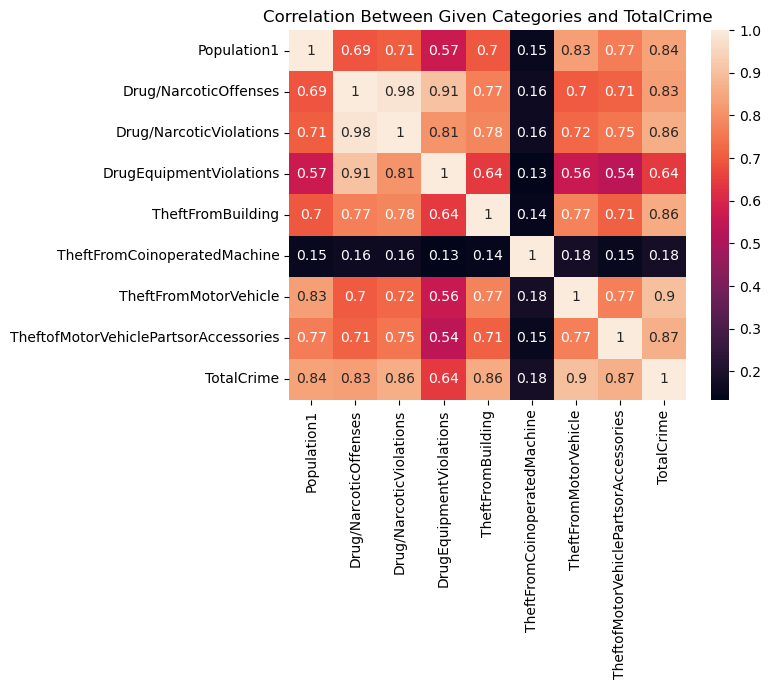

In [14]:
cr = model_task1.corr()
sns.heatmap(cr, annot=True)
plt.title('Correlation Between Given Categories and TotalCrime')

We can see that Drug/ Narcotic Offenses is highly correlated with Drug Equipment Violations and Drug/Narcotic Violation. This is due to the fact that Drug/Narcotic Offenses is the sum of the latter 2. Therefore we delete these two columns and only keep Drug/ Narcotic Offenses.

In [15]:
model_task1 = model_task1.drop(['Drug/NarcoticViolations', 'DrugEquipmentViolations'], axis=1)

In [16]:
# Partitioning the data

X = model_task1.iloc[:, :-1]
y = model_task1.iloc[:, [-1]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [17]:
# Building the Linear Regression Model

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [18]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = rmse_metric(mse)
r2 = r2_score(y_test, y_pred)

cv_scores = cross_val_score(lr, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
mse_scores = -cv_scores
mean_mse = np.mean(mse_scores)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)
print("Cross Validation MSE Score:", mean_mse)


Mean Absolute Error (MAE): 300.89920849371316
Mean Squared Error (MSE): 1010241.1462844941
Root Mean Squared Error (RMSE): 1005.1075297123657
R-squared (R2): 0.952132844972853
Cross Validation MSE Score: 2663030.3197916443


In [19]:
models = {
    "LinearRegression": LinearRegression(fit_intercept=True),
    "Ridge": Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=42),
    "Lasso": Lasso(alpha=0.1, 
              precompute=True, 
              positive=True, 
              selection='random', 
              random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + " trained.")

LinearRegression trained.
Ridge trained.
Lasso trained.


In [20]:
for name, model in models.items():
    test_pred = model.predict(X_test)
    print(name)
    mse = mean_squared_error(y_test, test_pred)
    print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, test_pred))
    print("Mean Squared Error (MSE):", mse)
    print('RMSE : ', rmse_metric(mse))
    print("R-squared (R2):", r2_score(y_test, test_pred))

    cv_scores = cross_val_score(lr, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    mse_scores = -cv_scores
    mean_mse = np.mean(mse_scores)
    print("Cross Validation MSE Score:", mean_mse)
    print("----------X----------X----------")
    

LinearRegression
Mean Absolute Error (MAE): 300.89920849371316
Mean Squared Error (MSE): 1010241.1462844941
RMSE :  1005.1075297123657
R-squared (R2): 0.952132844972853
Cross Validation MSE Score: 2663030.3197916443
----------X----------X----------
Ridge
Mean Absolute Error (MAE): 300.89875238069175
Mean Squared Error (MSE): 1010240.5235880453
RMSE :  1005.107219946233
R-squared (R2): 0.9521328744774
Cross Validation MSE Score: 2663030.3197916443
----------X----------X----------
Lasso
Mean Absolute Error (MAE): 299.4309897557818
Mean Squared Error (MSE): 1000231.0496377487
RMSE :  1000.1155181466532
R-squared (R2): 0.9526071424708203
Cross Validation MSE Score: 2663030.3197916443
----------X----------X----------


#### Feature Selection/Extraction For Task 2

In [21]:
columns_to_select = ['Population1'] + crime_categories

summarized = offence.loc[:, columns_to_select]
summarized.head()

,Population1,AssaultOffenses,Bribery,Burglary/Breaking&Entering,Destruction/Damage/Vandalism,Drug/NarcoticOffenses,Embezzlement,Extortion/Blackmail,FraudOffenses,GamblingOffenses,...,MotorVehicleTheft,Counterfeiting/Forgery,Pornography/ObsceneMaterial,ProstitutionOffenses,Robbery,SexOffenses,"SexOffenses,Nonforcible",StolenPropertyOffenses,WeaponLawViolations,TotalCrime
0,82332,870.0,0.0,391.0,280.0,495.0,70.0,0.0,202.0,0.0,...,88.0,55.0,4.0,0.0,46.0,25.0,0.0,29.0,26.0,4303.0
1,36986,559.0,0.0,237.0,447.0,308.0,0.0,1.0,162.0,0.0,...,68.0,58.0,1.0,0.0,21.0,35.0,2.0,28.0,25.0,2692.0
2,214264,1242.0,2.0,728.0,2303.0,2069.0,20.0,4.0,486.0,0.0,...,171.0,163.0,16.0,0.0,59.0,79.0,16.0,100.0,75.0,10141.0
3,214264,555.0,3.0,363.0,542.0,437.0,0.0,1.0,192.0,0.0,...,75.0,26.0,5.0,2.0,10.0,39.0,24.0,24.0,40.0,3025.0
4,5439,197.0,0.0,99.0,97.0,66.0,0.0,0.0,13.0,0.0,...,7.0,15.0,1.0,0.0,1.0,4.0,0.0,9.0,4.0,779.0


Feature Selection Using Correlation Matrix With Heatmap

Correlation indicates how the features are related to each other or the target variable. Correlation can be positive (increase in one value of feature increases the value of the target variable) or negative (increase in one value of feature decreases the value of the target variable). Heatmap makes it easy to identify which features are most related to the target variable.

Here, we will utilize a subset of the complete correlation matrix to specifically pinpoint the relationships between predictors and the target variable.

Text(0.5, 1.0, 'Correlation Between CrimeType and TotalCrime')

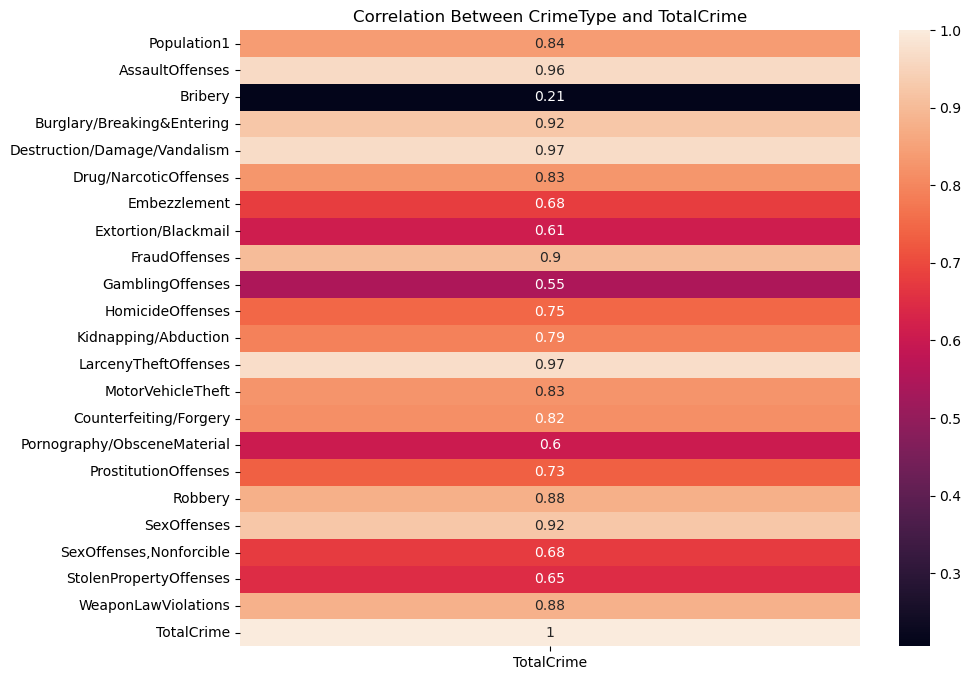

In [22]:
plt.figure(figsize=(10, 8))

cr = summarized.corr()
sns.heatmap(cr[['TotalCrime']], annot=True)
plt.title('Correlation Between CrimeType and TotalCrime')

Feature Selection Using Univariate Selection

Statistical tests can be used to identify features with the strongest relationship to the output variable. Specifically, We will utilize the chi-squared (chi²) statistical test, suitable for non-negative features, to select 15 of the best features from the given Dataset.

In [23]:
X = summarized.iloc[:, :-1]
y = summarized.iloc[:, [-1]]

# Extracting Top 15 features
bestfeatures = SelectKBest(score_func=chi2, k=15)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']

featureScores['Score']=featureScores['Score'].round(0)
print(featureScores.nlargest(15,'Score'))

                           Specs        Score
0                    Population1  393518523.0
1                AssaultOffenses   25085644.0
12          LarcenyTheftOffenses   21206766.0
3     Burglary/Breaking&Entering   11114478.0
4   Destruction/Damage/Vandalism    9638968.0
13             MotorVehicleTheft    8784145.0
5          Drug/NarcoticOffenses    6520771.0
17                       Robbery    6038722.0
8                  FraudOffenses    3319392.0
21           WeaponLawViolations    1589089.0
16          ProstitutionOffenses    1291314.0
18                   SexOffenses     823683.0
14        Counterfeiting/Forgery     764146.0
11          Kidnapping/Abduction     489596.0
6                   Embezzlement     468434.0


In [24]:
dummies = pd.get_dummies(offence[['AgencyType']])
model_df = pd.concat([dummies, summarized], axis=1)
model_df.head()

,AgencyType_Cities,AgencyType_Metropolitan Counties,AgencyType_Nonmetropolitan Counties,AgencyType_Other Agencies,AgencyType_Other Agencies - Tribal,AgencyType_State Police Agencies,AgencyType_Universities and Colleges,Population1,AssaultOffenses,Bribery,...,MotorVehicleTheft,Counterfeiting/Forgery,Pornography/ObsceneMaterial,ProstitutionOffenses,Robbery,SexOffenses,"SexOffenses,Nonforcible",StolenPropertyOffenses,WeaponLawViolations,TotalCrime
0,1,0,0,0,0,0,0,82332,870.0,0.0,...,88.0,55.0,4.0,0.0,46.0,25.0,0.0,29.0,26.0,4303.0
1,1,0,0,0,0,0,0,36986,559.0,0.0,...,68.0,58.0,1.0,0.0,21.0,35.0,2.0,28.0,25.0,2692.0
2,1,0,0,0,0,0,0,214264,1242.0,2.0,...,171.0,163.0,16.0,0.0,59.0,79.0,16.0,100.0,75.0,10141.0
3,0,1,0,0,0,0,0,214264,555.0,3.0,...,75.0,26.0,5.0,2.0,10.0,39.0,24.0,24.0,40.0,3025.0
4,1,0,0,0,0,0,0,5439,197.0,0.0,...,7.0,15.0,1.0,0.0,1.0,4.0,0.0,9.0,4.0,779.0


In [25]:
temp = ['TotalCrime', 'AgencyType_Cities', 'AgencyType_Metropolitan Counties',
       'AgencyType_Nonmetropolitan Counties', 'AgencyType_Other Agencies',
       'AgencyType_Other Agencies - Tribal',
       'AgencyType_State Police Agencies',
       'AgencyType_Universities and Colleges']

final_features = temp + featureScores.nlargest(15,'Score')['Specs'].to_list()
final_features

['TotalCrime',
 'AgencyType_Cities',
 'AgencyType_Metropolitan Counties',
 'AgencyType_Nonmetropolitan Counties',
 'AgencyType_Other Agencies',
 'AgencyType_Other Agencies - Tribal',
 'AgencyType_State Police Agencies',
 'AgencyType_Universities and Colleges',
 'Population1',
 'AssaultOffenses',
 'LarcenyTheftOffenses',
 'Burglary/Breaking&Entering',
 'Destruction/Damage/Vandalism',
 'MotorVehicleTheft',
 'Drug/NarcoticOffenses',
 'Robbery',
 'FraudOffenses',
 'WeaponLawViolations',
 'ProstitutionOffenses',
 'SexOffenses',
 'Counterfeiting/Forgery',
 'Kidnapping/Abduction',
 'Embezzlement']

We will take 2 approaches to model training.
1. Approach 1 : We use all 29 predictors with PCA
2. Approach 2 : We use the shortlisted 22 features with PCA

Approach 1

In [26]:
X = model_df.iloc[:, :-1]
y = model_df.iloc[:, [-1]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

Feature Extraction Using Principal Component Analysis

Text(0, 0.5, 'cumulative explained variance')

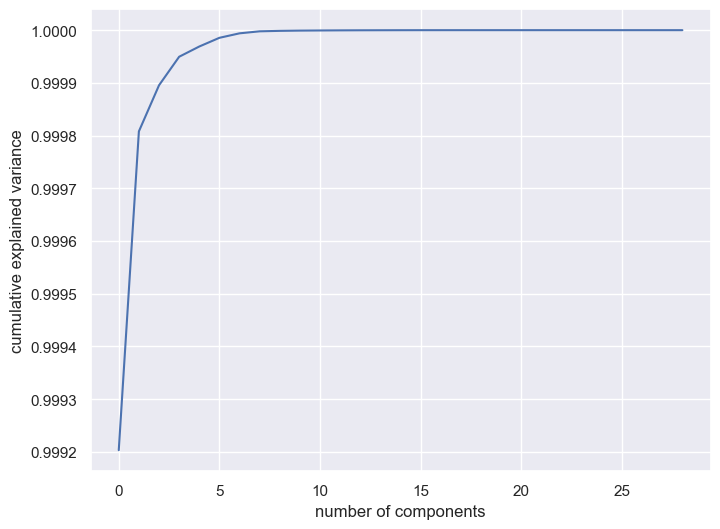

In [27]:
pca_test = PCA(n_components=29)
pca_test.fit(X_train)
sns.set(style='whitegrid')
sns.set(rc={'figure.figsize':(8,6)})

plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [28]:
pca = PCA(n_components=20)
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [29]:
models = {
    "LinearRegression": LinearRegression(fit_intercept=True),
    "Ridge": Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=42),
    "Lasso": Lasso(alpha=0.1, 
              precompute=True, 
              positive=True, 
              selection='random',
              random_state=42),
    "k-NN": KNeighborsRegressor(n_neighbors=5, metric='manhattan'),
    "Gradient": SGDRegressor(n_iter_no_change=250, penalty=None, eta0=0.0001, max_iter=100000),
    "Random Forest": RandomForestRegressor(n_estimators=1000)
    #"SVM" : SVR(kernel='rbf', C=1000000, epsilon=0.001)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + " trained.")

LinearRegression trained.
Ridge trained.
Lasso trained.
k-NN trained.


/Users/rishabh_hm/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradient trained.


/var/folders/95/w1g1703d3d9b864tbbl9hnp80000gn/T/ipykernel_979/1441252626.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Random Forest trained.


In [30]:
for name, model in models.items():
    test_pred = model.predict(X_test)
    print(name)
    mse = mean_squared_error(y_test, test_pred)
    print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, test_pred))
    print("Mean Squared Error (MSE):", mse)
    print('RMSE : ', rmse_metric(mse))
    print("R-squared (R2):", r2_score(y_test, test_pred))
    
    cv_scores = cross_val_score(lr, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    mse_scores = -cv_scores
    mean_mse = np.mean(mse_scores)
    print("Cross Validation MSE Score:", mean_mse)
    print("----------X----------X----------")

LinearRegression
Mean Absolute Error (MAE): 0.31944254060963584
Mean Squared Error (MSE): 0.734981664642799
RMSE :  0.8573107165099472
R-squared (R2): 0.9999999497461876
Cross Validation MSE Score: 3.1268966483215683
----------X----------X----------
Ridge
Mean Absolute Error (MAE): 0.3211205215121861
Mean Squared Error (MSE): 0.74504552629914
RMSE :  0.8631601973557053
R-squared (R2): 0.9999999490580787
Cross Validation MSE Score: 3.1268966483215683
----------X----------X----------
Lasso
Mean Absolute Error (MAE): 742.821013474636
Mean Squared Error (MSE): 4300336.380242569
RMSE :  2073.725242225346
R-squared (R2): 0.7059677698802757
Cross Validation MSE Score: 3.1268966483215683
----------X----------X----------
k-NN
Mean Absolute Error (MAE): 265.1152024446142
Mean Squared Error (MSE): 3372364.9505576775
RMSE :  1836.3999974291214
R-squared (R2): 0.769417110776312
Cross Validation MSE Score: 3.1268966483215683
----------X----------X----------
Gradient
Mean Absolute Error (MAE): 369483

Appraoch 2

In [31]:
X = model_df[final_features].iloc[:, 1:]
y = model_df[final_features].iloc[:, [0]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

Feature Extraction Using Principal Component Analysis


Text(0, 0.5, 'Cumulative Explained Variance')

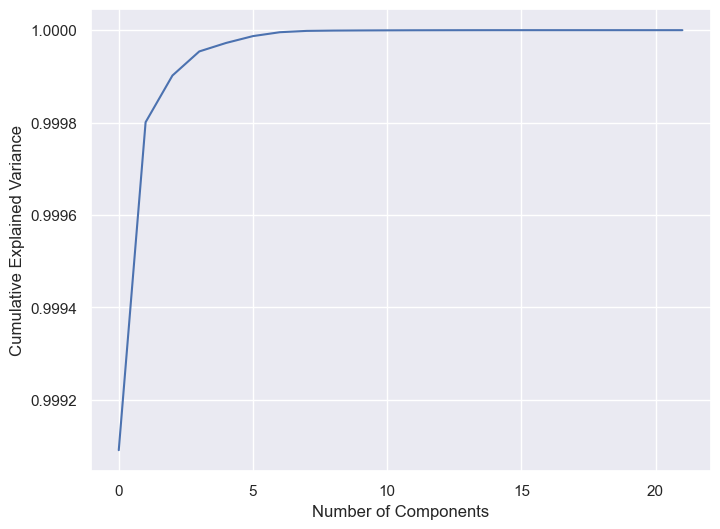

In [32]:
pca_test = PCA(n_components=22)
pca_test.fit(X_train)
sns.set(style='whitegrid')
sns.set(rc={'figure.figsize':(8,6)})

plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [33]:
pca = PCA(n_components=15)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

To determine the ideal number of neighbor for KNN algorithm, let's perform a grid search.

Testing for 1 neighbour..
Testing for 2 neighbour..
Testing for 3 neighbour..
Testing for 4 neighbour..
Testing for 5 neighbour..
Testing for 6 neighbour..
Testing for 7 neighbour..
Testing for 8 neighbour..
Testing for 9 neighbour..


Text(0, 0.5, 'RMSE')

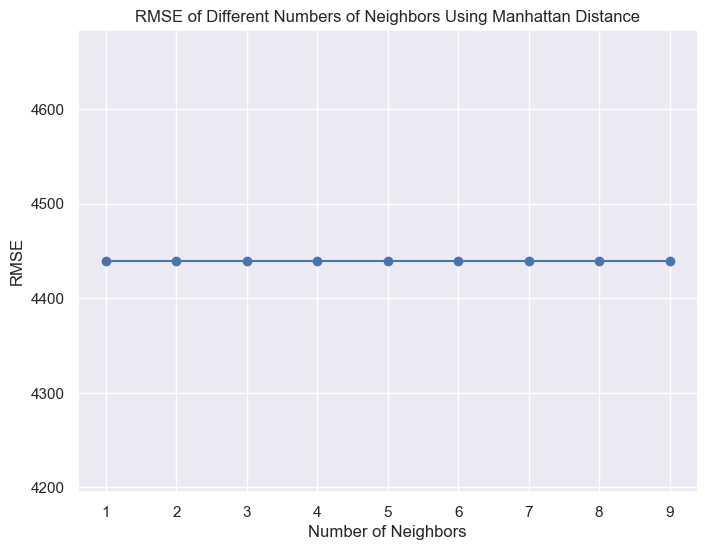

In [34]:
knn_acc = []

for k in range(1,10):
    print(f'Testing for {k} neighbour..')
    model = KNeighborsRegressor(n_neighbors=k, p=1)
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)
    
    # Accuracy
    mse = mean_squared_error(y_test, test_pred)
    rmse = rmse_metric(mse)
    knn_acc.append(rmse)
    #print(f'RMSE for {k} neighbors is: {round(rmse,4)}\n')

plt.plot(range(1, len(knn_acc) + 1), knn_acc, marker='o')
plt.title('RMSE of Different Numbers of Neighbors Using Manhattan Distance')
plt.xlabel('Number of Neighbors')
plt.ylabel('RMSE')

In [35]:
models = {
    "LinearRegression": LinearRegression(fit_intercept=True),
    "Ridge": Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=42),
    "Lasso": Lasso(alpha=0.1, 
              precompute=True, 
              positive=True, 
              selection='random',
              random_state=42),
    "k-NN": KNeighborsRegressor(n_neighbors=5, metric='manhattan'),
    "Gradient": SGDRegressor(n_iter_no_change=250, penalty=None, eta0=0.0001, max_iter=100000),
    "Random Forest": RandomForestRegressor(n_estimators=1000)
    #"SVM" : SVR(kernel='rbf', C=1000000, epsilon=0.001)
}

for name, model in models.items():
    model.fit(X_train_pca, y_train)
    print(name + " trained.")

LinearRegression trained.
Ridge trained.
Lasso trained.
k-NN trained.


/Users/rishabh_hm/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradient trained.


/var/folders/95/w1g1703d3d9b864tbbl9hnp80000gn/T/ipykernel_979/937727494.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_pca, y_train)


Random Forest trained.


In [36]:
for name, model in models.items():
    test_pred = model.predict(X_test_pca)
    print(name)
    mse = mean_squared_error(y_test, test_pred)
    print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, test_pred))
    print("Mean Squared Error (MSE):", mse)
    print('RMSE : ', rmse_metric(mse))
    print("R-squared (R2):", r2_score(y_test, test_pred))
    
    cv_scores = cross_val_score(lr, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    mse_scores = -cv_scores
    mean_mse = np.mean(mse_scores)
    print("Cross Validation MSE Score:", mean_mse)
    print("----------X----------X----------")

LinearRegression
Mean Absolute Error (MAE): 6.954478306108846
Mean Squared Error (MSE): 419.13849265388455
RMSE :  20.472872115408833
R-squared (R2): 0.9999650988247312
Cross Validation MSE Score: 222.7469778148673
----------X----------X----------
Ridge
Mean Absolute Error (MAE): 6.954046694123056
Mean Squared Error (MSE): 419.09908298605626
RMSE :  20.471909607705292
R-squared (R2): 0.9999651021063284
Cross Validation MSE Score: 222.7469778148673
----------X----------X----------
Lasso
Mean Absolute Error (MAE): 843.865247185952
Mean Squared Error (MSE): 3240882.018219695
RMSE :  1800.2449883889956
R-squared (R2): 0.7301355200582742
Cross Validation MSE Score: 222.7469778148673
----------X----------X----------
k-NN
Mean Absolute Error (MAE): 283.696103896104
Mean Squared Error (MSE): 1209098.213934301
RMSE :  1099.5900208415412
R-squared (R2): 0.8993197966271259
Cross Validation MSE Score: 222.7469778148673
----------X----------X----------
Gradient
Mean Absolute Error (MAE): 2752868098